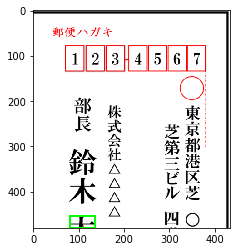

In [23]:
import cv2
import matplotlib.pyplot as plt

# ハガキ画像から郵便番号領域を抽出する関数
def detect_zipno(fname):
    # 画像読み込み
    img = cv2.imread(fname)
    # 画像のサイズ求める
    h, w = img.shape[:2]
    # 上半分、右2/3をとる
    img = img[0:h//2, w//3:]
    
    # 画像を二値化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(3,3),0)
    im2 = cv2.threshold(gray,140,255,cv2.THRESH_BINARY_INV)[1]
    
    # 輪郭抽出
    cnts = cv2.findContours(im2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[1]
    
    # 抽出した輪郭をリストに変換
    result = []
    for pt in cnts:
        x,y,w,h = cv2.boundingRect(pt)
        # 大きすぎる小さすぎる領域を除去
        if not (50 < w < 70): continue
        result.append([x,y,w,h])
        # 抽出した輪郭が左側から並ぶようにソート x基準（０要素め）
        # sorted(配列,key=ソートに使う列)
        result = sorted(result,key = lambda x:x[0])
        # 輪郭が近すぎるものを除去 xの差が１０以上になるようにとる
        result2 = []
        lastx = -100
        for x,y,w,h in result:
            if ( x -lastx) < 10: continue
            result2.append([x,y,w,h])
            lastx = x
        
        green = (0,255,0)
        
        # 緑色の枠を描画
        for x,y,w,h in result2:
            cv2.rectangle(img,(x,y),(x + w, y + h),green, 3)
        return result2, img
    
if __name__ == '__main__':
    #　ハガキ画像を指定して　領域を抽出する
    cnts, img = detect_zipno("postcard.jpg")
    
    # 画面に抽出結果を描画
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.jpg", dpi =200)
    plt.show()
    
    